<a href="https://colab.research.google.com/github/labibahanastu/MachineLearning_Assignment/blob/main/ML_Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction

In [10]:
import numpy as np
import pandas as pd
import time

# For plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#PCA
from sklearn.decomposition import PCA


import plotly.io as plt_io
import plotly.graph_objects as go

from sklearn.datasets import load_iris
import seaborn as sns


In [ ]:
train = pd.read_csv('sign_mnist_train.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


# 1. Principal Component Analysis (PCA)

One of the most known dimensionality reduction “unsupervised” algorithm is PCA(Principal Component Analysis). This works by identifying the hyperplane which lies closest to the data and then projects the data on that hyperplane while retaining most of the variation in the data set. Principal Components.

In [ ]:
train.shape

(27455, 785)

In [ ]:
train = train[train['label'] < 10]
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
6,8,134,134,135,135,136,137,137,138,138,138,139,138,138,139,138,139,139,139,139,138,138,138,137,136,135,134,134,134,139,137,138,139,139,138,140,140,141,142,142,...,79,116,126,121,109,79,70,171,183,179,180,179,173,174,176,177,179,179,179,179,174,179,196,178,160,147,114,94,92,120,109,102,91,65,138,189,179,181,181,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27429,5,114,113,112,113,113,115,114,116,117,114,115,119,111,115,118,116,115,115,113,113,114,114,111,118,83,0,0,0,117,115,115,117,118,120,120,120,120,120,113,...,176,178,177,176,176,174,173,172,171,173,152,128,174,175,178,167,176,175,171,157,123,85,56,50,43,47,105,182,181,178,179,179,179,176,176,174,173,169,141,133
27432,2,164,166,167,167,168,168,168,168,168,168,167,167,167,166,165,165,165,164,163,161,161,161,158,156,154,152,152,151,166,167,168,169,170,170,171,170,169,169,168,...,74,78,77,77,61,117,244,235,227,230,226,231,82,82,79,84,163,156,124,91,85,82,79,75,71,69,77,77,76,83,78,72,79,221,244,229,224,229,222,229
27435,1,181,182,183,182,183,183,183,183,182,180,180,181,179,178,178,175,175,174,172,172,172,169,167,164,172,93,33,29,182,182,184,184,186,186,184,184,183,183,182,...,110,91,52,86,202,198,201,182,147,113,71,49,209,210,211,210,222,172,54,53,77,122,140,127,102,100,102,112,92,62,57,186,204,179,128,69,38,27,33,45
27440,5,174,177,179,181,183,184,185,188,193,192,193,194,195,197,199,201,201,200,201,202,202,203,203,203,203,202,203,203,176,179,181,182,184,184,192,175,174,195,192,...,220,220,220,221,221,220,219,220,220,219,219,219,228,214,204,215,189,122,134,147,121,180,222,214,214,216,217,220,220,220,221,222,222,221,220,220,220,220,220,220


In [ ]:
y = train.loc[:,'label'].values
x = train.loc[:,'pixel1':].values

In [ ]:
from sklearn.preprocessing import StandardScaler
## Standardizing the data
standardized_data = StandardScaler().fit_transform(x)

In [ ]:
## Importing and Apply PCA
start = time.time()
pca = PCA(n_components=3) # project from 784 to 2 dimensions
principalComponents = pca.fit_transform(standardized_data)
principal_df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])
principal_df.shape
print('Duration: {} seconds'.format(time.time() - start))

Duration: 1.0638957023620605 seconds


In [ ]:
def plot_2d(component1, component2):
    
    fig = go.Figure(data=go.Scatter(
        x = component1,
        y = component2,
        mode='markers',
        marker=dict(
            size=20,
            color=y, #set color equal to a variable
            colorscale='Rainbow', # one of plotly colorscales
            showscale=True,
            line_width=1
        )
    ))
    fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=2000,height=1200)                 
    fig.layout.template = 'plotly_dark'
    
    fig.show()

In [ ]:
def plot_3d(component1,component2,component3):

    fig = go.Figure(data=[go.Scatter3d(
        x=component1,
        y=component2,
        z=component3,
        mode='markers',
        marker=dict(
            size=10,
            color=y,                # set color to an array/list of desired values
            colorscale='Rainbow',   # choose a colorscale
            opacity=1,
            line_width=1
        )
    )])

    # tight layout
    fig.update_layout(margin=dict(l=50,r=50,b=50,t=50),width=1800,height=1000)
    fig.layout.template = 'plotly_dark'
    
    fig.show()

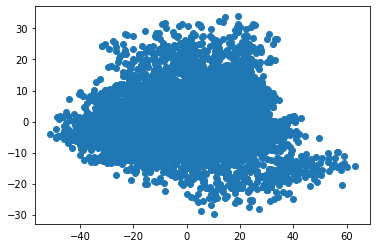

In [ ]:
plt.scatter(principalComponents[:, 0],principalComponents[:, 1])

# 2. LDA ( Linear Discriminant Analysis )

Linear Discriminant Analysis (LDA) is most commonly used as a dimensionality reduction technique in the pre-processing step for pattern-classification. The goal is to project a dataset onto a lower-dimensional space with good class-separability in order to avoid overfitting and also reduce computational costs.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

start = time.time()
X_LDA = LDA(n_components=3).fit_transform(standardized_data,y)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 3.194679021835327 seconds


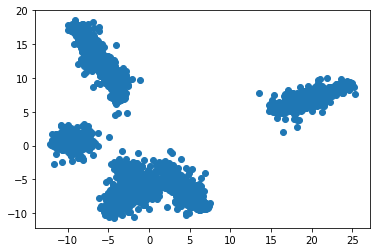

In [ ]:
plt.scatter(X_LDA[:, 0],X_LDA[:, 1])

# 3. SVD (Singular Value Decomposition)

SVD is a factorization used for solving linear equations, dimensionality reduction, data compression and so on

In [3]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
data = pd.DataFrame(iris.data)
feature_names = iris["feature_names"]
data.columns = feature_names
data["labels"] = iris.target

In [11]:
def custom_pairplot(data, feature_names, labels):
    plt.figure(figsize=(10, 10))
    plt.subplots_adjust(left = 0, right=1.5, bottom=0, top=1.5)
    n_features = len(feature_names)
    
    for i in range(len(feature_names)):
        for j in range(len(feature_names)):
            plt.subplot(n_features, n_features, i*n_features+j+1)
            if i==j:
                sns.violinplot(data=data, x=labels, y=feature_names[i])
            else:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], c=data[labels])
                plt.xlabel(feature_names[i])
                plt.ylabel(feature_names[j])

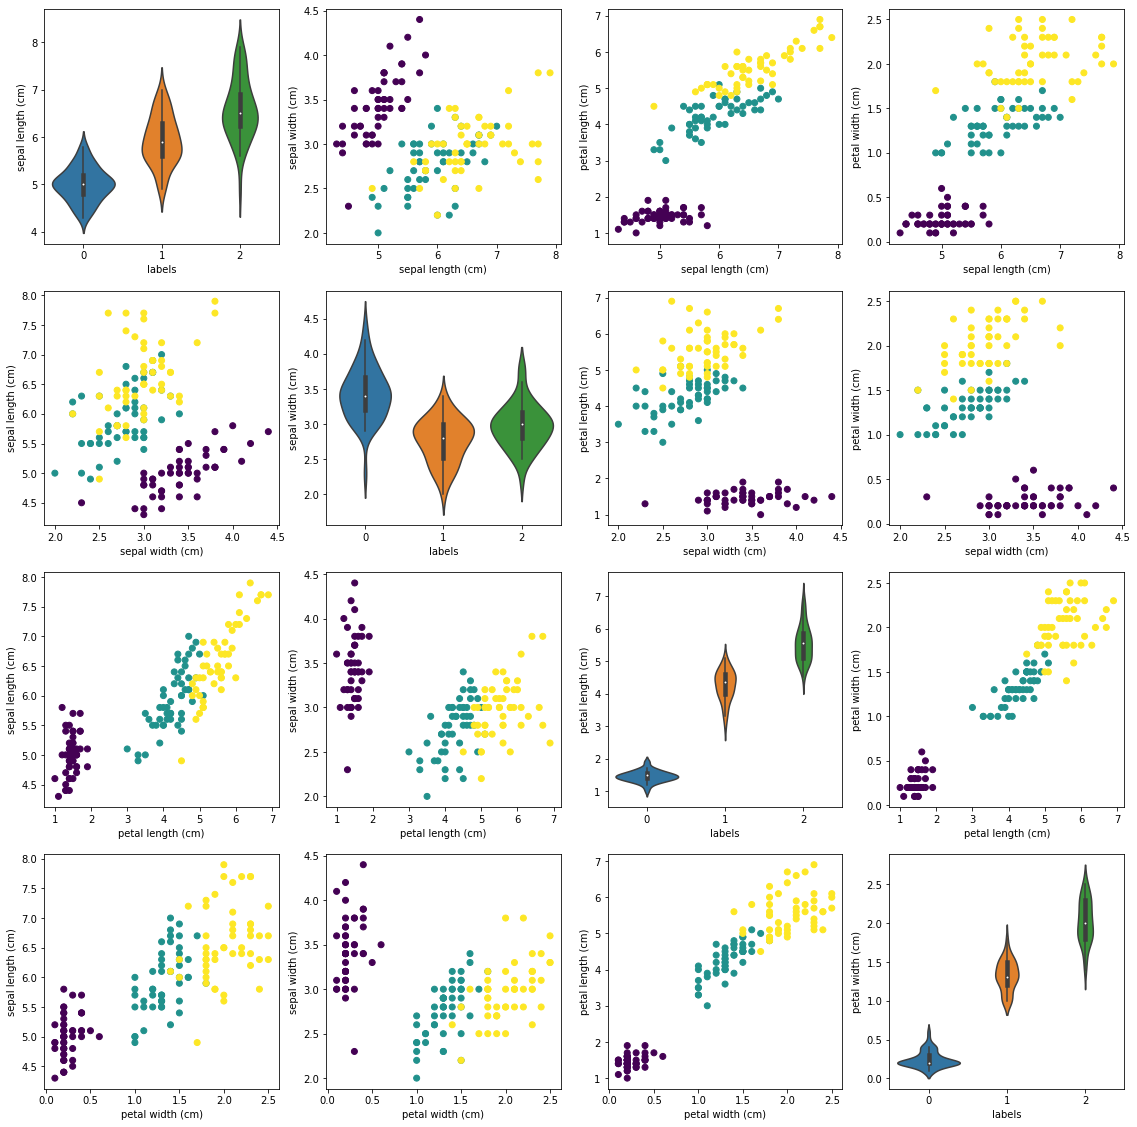

In [12]:
custom_pairplot(data, feature_names=feature_names, labels="labels")